In [1]:
# # unzip polyvore.tar.gz

# import os
# import tarfile

# def unzip_tar_gz(tar_gz_file, target_dir):
#     tar = tarfile.open(tar_gz_file, "r:gz")
#     tar.extractall(target_dir)
#     tar.close()

# if __name__ == "__main__":
#     tar_gz_file = "polyvore.tar.gz"
#     target_dir = "polyvore"
#     unzip_tar_gz(tar_gz_file, target_dir)
#     print("Unzipped {} to {}".format(tar_gz_file, target_dir))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from collections import Counter

def load_data(data_dir):
    data_train = pd.read_json(data_dir + "/train_no_dup.json")
    data_test = pd.read_json(data_dir + "/test_no_dup.json")
    data_valid = pd.read_json(data_dir + "/valid_no_dup.json")
    return data_train, data_test, data_valid

data_dir = "polyvore"
data_train,data_test,data_valid = load_data(data_dir)
data_train

,name,views,items,image,likes,date,set_url,set_id,desc
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...
...,...,...,...,...,...,...,...,...,...
17311,2.15.17,183,"[{'index': 1, 'name': 'raey deep v-neck silk c...",http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,117,4 days,http://www.polyvore.com/15.17/set?id=216801059,216801059,A fashion look from February 2017 by kianahall...
17312,tweed,2428,"[{'index': 1, 'name': 'michael kors printed bo...",http://ak1.polyvoreimg.com/cgi/img-set/cid/190...,382,One year,http://www.polyvore.com/tweed/set?id=190488700,190488700,A fashion look from February 2016 by drigomes ...
17313,TV Style: Pretty Little Liars,2184,"[{'index': 1, 'name': 'color block fit flare m...",http://ak2.polyvoreimg.com/cgi/img-set/cid/187...,398,One year,http://www.polyvore.com/tv_style_pretty_little...,187504514,A fashion look from January 2016 by vanjazivad...
17314,60-Second Style: Work Wear,3147,"[{'index': 1, 'name': 'patchwork fit flare dre...",http://ak2.polyvoreimg.com/cgi/img-set/cid/211...,440,Three months,http://www.polyvore.com/60-second_style_work_w...,211085207,A fashion look from November 2016 by beebeely-...


In [3]:
df = pd.DataFrame(data_train)
# Describe numeric columns
df["item_price"] = df["items"].apply(lambda x: x[0]["price"])
# filter out items with price = -1
df = df[df["item_price"] != -1]
df['item_likes'] = df['items'].apply(lambda x: x[0]['likes'])
df['item_name'] = df['items'].apply(lambda x: x[0]['name'])
print(df.describe().loc[:, df.describe().columns != 'set_id'])

               views         likes     item_price    item_likes
count   16987.000000  16987.000000   16987.000000  16987.000000
mean     3390.258904    320.693177     401.003104   4111.968564
std     18227.955047    516.929652    6589.298002   6595.816131
min         4.000000      1.000000       0.100000      1.000000
25%       164.000000     25.000000      19.000000    165.000000
50%       625.000000    127.000000      43.000000   1338.000000
75%      2120.000000    394.000000     230.000000   5418.000000
max    521627.000000   8985.000000  456604.000000  89214.000000


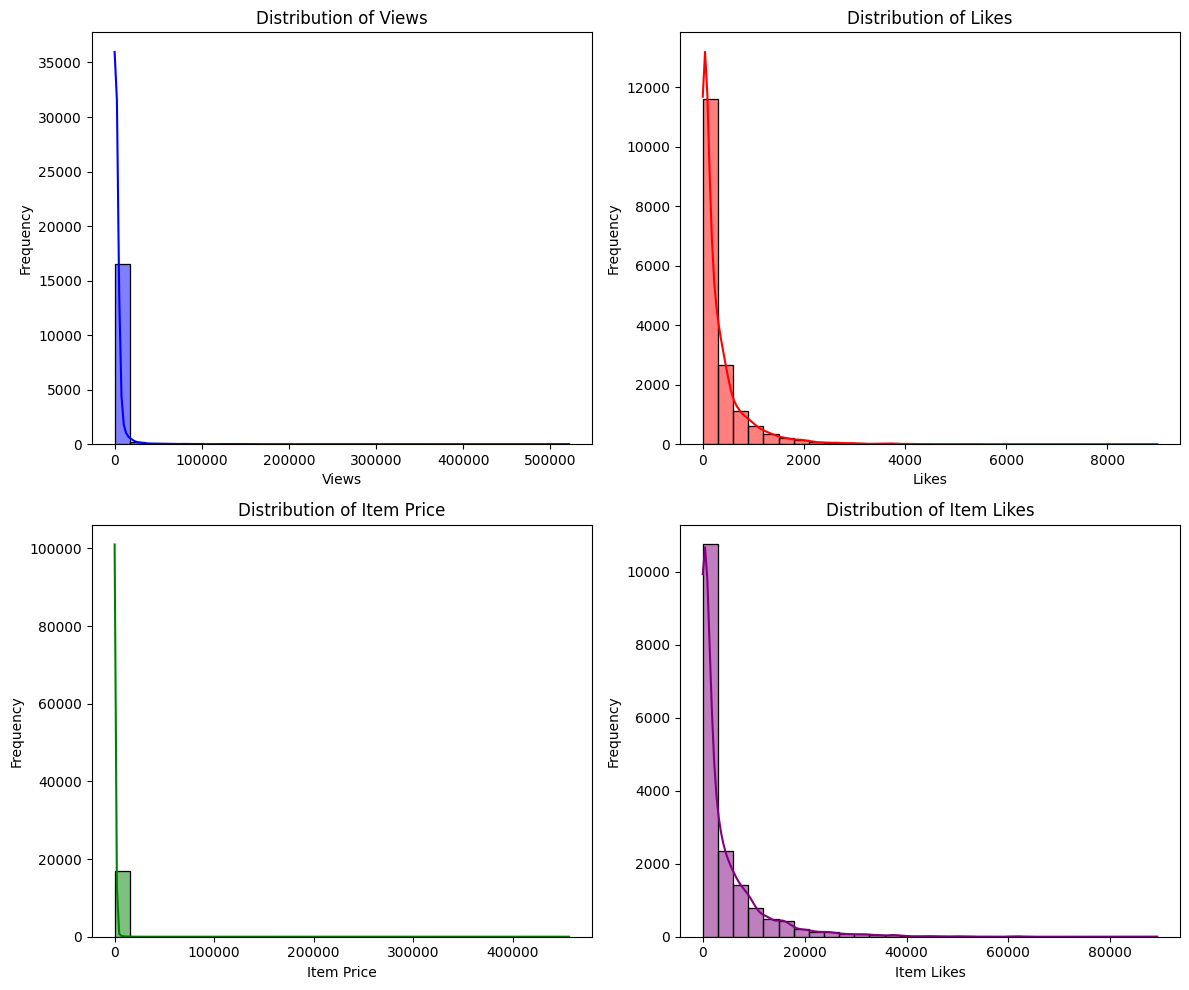

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# Views distribution
plt.subplot(2, 2, 1)
sns.histplot(df['views'], bins=30, kde=True, color='blue')
plt.title("Distribution of Views")
plt.xlabel('Views')
plt.ylabel('Frequency')

# Likes distribution
plt.subplot(2, 2, 2)
sns.histplot(df['likes'], bins=30, kde=True, color='red')
plt.title("Distribution of Likes")
plt.xlabel('Likes')
plt.ylabel('Frequency')

# Price distribution
plt.subplot(2, 2, 3)
sns.histplot(df['item_price'], bins=30, kde=True, color='green')
plt.title("Distribution of Item Price")
plt.xlabel('Item Price')
plt.ylabel('Frequency')

# Item_likes distribution
plt.subplot(2, 2, 4)
sns.histplot(df['item_likes'], bins=30, kde=True, color='purple')
plt.title("Distribution of Item Likes")
plt.xlabel('Item Likes')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

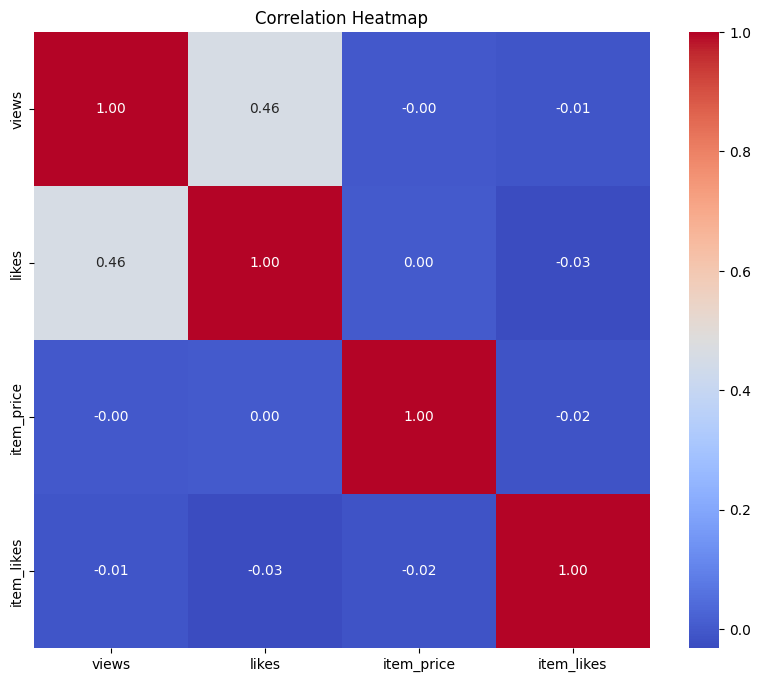

In [5]:
# Compute correlation matrix
df_views_likes_price = df[['views', 'likes', 'item_price','item_likes']]
corr = df_views_likes_price.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
df

,name,views,items,image,likes,date,set_url,set_id,desc,item_price,item_likes,item_name
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...,24.0,10,mock neck embroidery suede sweatshirt
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...,10.0,1290,nirvana distressed t-shirt
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14,16.0,20094,monki singlet
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...,18.0,2036,tops
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...,16.0,6637,yoins leather sexy v-neck sleeveless crop top
...,...,...,...,...,...,...,...,...,...,...,...,...
17311,2.15.17,183,"[{'index': 1, 'name': 'raey deep v-neck silk c...",http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,117,4 days,http://www.polyvore.com/15.17/set?id=216801059,216801059,A fashion look from February 2017 by kianahall...,125.0,21088,raey deep v-neck silk cami top
17312,tweed,2428,"[{'index': 1, 'name': 'michael kors printed bo...",http://ak1.polyvoreimg.com/cgi/img-set/cid/190...,382,One year,http://www.polyvore.com/tweed/set?id=190488700,190488700,A fashion look from February 2016 by drigomes ...,1495.0,225,michael kors printed bow shirt world
17313,TV Style: Pretty Little Liars,2184,"[{'index': 1, 'name': 'color block fit flare m...",http://ak2.polyvoreimg.com/cgi/img-set/cid/187...,398,One year,http://www.polyvore.com/tv_style_pretty_little...,187504514,A fashion look from January 2016 by vanjazivad...,17.0,21,color block fit flare maxi chiffon dress
17314,60-Second Style: Work Wear,3147,"[{'index': 1, 'name': 'patchwork fit flare dre...",http://ak2.polyvoreimg.com/cgi/img-set/cid/211...,440,Three months,http://www.polyvore.com/60-second_style_work_w...,211085207,A fashion look from November 2016 by beebeely-...,16.0,26,patchwork fit flare dress


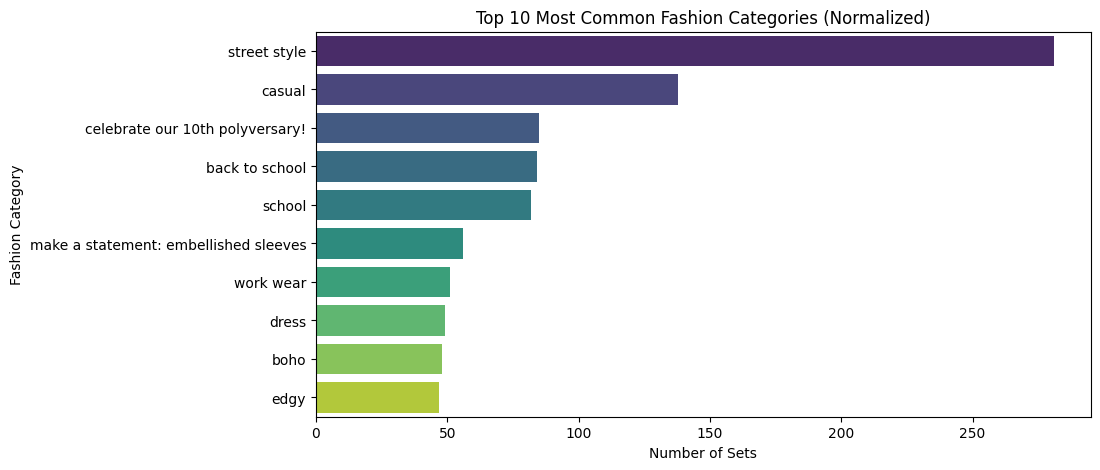

In [7]:
# Normalize category names (convert to lowercase and strip spaces)
data_train['normalized_name'] = data_train['name'].str.lower().str.strip()

# Count occurrences of each category (excluding duplicates)
top_categories = data_train['normalized_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")
plt.title("Top 10 Most Common Fashion Categories (Normalized)")
plt.xlabel("Number of Sets")
plt.ylabel("Fashion Category")
plt.show()

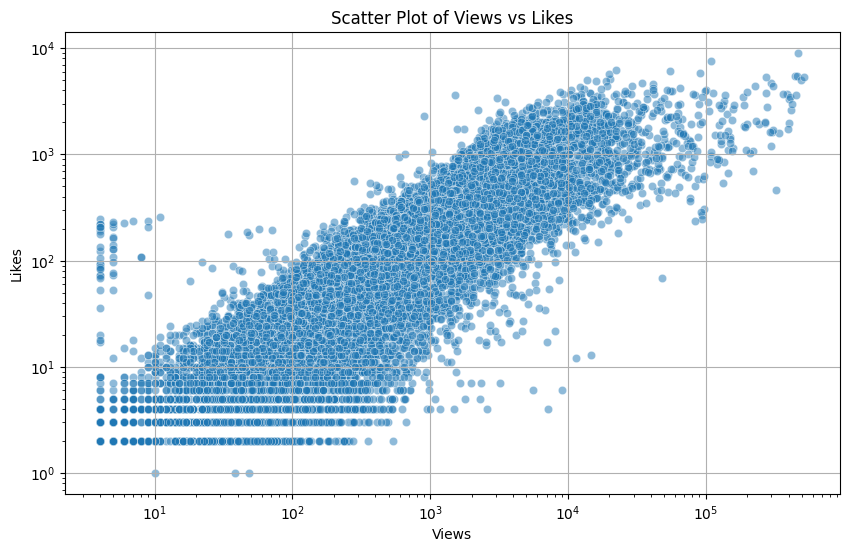

In [8]:
# scatter plot of views vs likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='likes', alpha=0.5)
plt.title("Scatter Plot of Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# since the other pairwise correlations are weak, we will only focus on the correlation between views and likes


In [9]:
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    outliers = {}
    for col in numeric_cols:
        if col != 'set_id':
            z_scores = np.abs(stats.zscore(df[col]))
            outliers[col] = df[z_scores > 3].shape[0]
        
    print("Outlier Counts:")
    print(outliers)
    return outliers

outliers = detect_outliers(df)

Outlier Counts:
{'views': 140, 'likes': 367, 'item_price': 9, 'item_likes': 415}


In [10]:
import json

# Load datasets
def load_json(file_path):
    with open(file_path, "r") as f:
        return json.load(f)

train_data = load_json("polyvore/train_no_dup.json")
valid_data = load_json("polyvore/valid_no_dup.json")
test_data = load_json("polyvore/test_no_dup.json")

print(f"Training Set: {len(train_data)} entries")
print(f"Validation Set: {len(valid_data)} entries")
print(f"Test Set: {len(test_data)} entries")

Training Set: 17316 entries
Validation Set: 1497 entries
Test Set: 3076 entries


In [ ]:
# TODO: Create X and y datasets